In [2]:
# Changing run_cell to have only one running cell

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
params_orig = "../backend/params/vic/params.nc"
ds = xr.open_dataset(params_orig)

ds

# ds.run_cell.data = np.zeros_like(ds.run_cell.data)

# # One cell will run @ 150, 150
# ds.run_cell[150, 150] = 1

# ds.to_netcdf("../backend/params/vic/params.nc")

<xarray.Dataset>
Dimensions:       (lat: 388, lon: 237, month: 12, nlayer: 3, root_zone: 3, veg_class: 16)
Coordinates:
  * root_zone     (root_zone) int64 1 2 3
  * veg_class     (veg_class) int64 1 2 3 5 6 7 8 9 10 11 13 14 15 16 18 21
  * lat           (lat) float64 9.594 9.656 9.719 9.781 ... 33.66 33.72 33.78
  * lon           (lon) float64 93.91 93.97 94.03 94.09 ... 108.5 108.6 108.7
  * nlayer        (nlayer) int64 1 2 3
  * month         (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables: (12/44)
    gridcell      (lat, lon) float64 ...
    infilt        (lat, lon) float64 ...
    Ds            (lat, lon) float64 ...
    Dsmax         (lat, lon) float64 ...
    Ws            (lat, lon) float64 ...
    c             (lat, lon) float64 ...
    ...            ...
    root_depth    (veg_class, root_zone, lat, lon) float64 ...
    root_fract    (veg_class, root_zone, lat, lon) float64 ...
    LAI           (veg_class, month, lat, lon) float64 ...
    albedo        (veg_class, month, lat, lon) float64 ...
    veg_rough     (veg_class, month, lat, lon) float64 ...
    displacement  (veg_class, month, lat, lon) float64 ...

In [20]:
param = ds.fillna(0).reindex(lat=list(reversed(ds.lat)))

# ds.gridcell.plot()

In [52]:
# t = ds.sel(nlayer=2)
# t['nlayer'] = 3
# # t
# ds
# # merged = xr.concat([ds[['expt', 'Ksat', 'phi_s', 'init_moist', 'depth', 'bubble', 'quartz', 'bulk_density', 'soil_density', 'Wcr_FRACT']], t], dim='nlayer')
# merged = xr.concat([ds, t], dim='nlayer', data_vars='minimal')
# merged
# merged.to_netcdf("../backend/params/vic/params.nc")

# Let's have a look at the vic sample data 

## Parameter file

In [54]:
ds_ref = xr.open_dataset("../backend/data/VIC_sample_data/image/WalnutGulch/parameters/params.WalnutGulch.L2015.0.0625_deg.nc")
ds_ref

<xarray.Dataset>
Dimensions:       (lat: 3, lon: 5, month: 12, nlayer: 3, root_zone: 3, snow_band: 5, veg_class: 12)
Coordinates:
  * month         (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * veg_class     (veg_class) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * lon           (lon) float64 -110.2 -110.1 -110.0 -110.0 -109.9
  * snow_band     (snow_band) int32 1 2 3 4 5
  * lat           (lat) float64 31.66 31.72 31.78
  * root_zone     (root_zone) int32 1 2 3
Dimensions without coordinates: nlayer
Data variables: (12/52)
    veg_descr     (veg_class) |S20 ...
    albedo        (veg_class, month, lat, lon) float64 ...
    veg_rough     (veg_class, month, lat, lon) float64 ...
    LAI           (veg_class, month, lat, lon) float64 ...
    displacement  (veg_class, month, lat, lon) float64 ...
    RGL           (veg_class, lat, lon) float64 ...
    ...            ...
    Ksat          (nlayer, lat, lon) float64 ...
    quartz        (nlayer, lat, lon) float64 ...
    soil_density  (nlayer, lat, lon) float64 ...
    bubble        (nlayer, lat, lon) float64 ...
    expt          (nlayer, lat, lon) float64 ...
    layer         (nlayer) int32 ...
Attributes:
    source:       
    description:  VIC parameter file
    username:     ted
    history:      Created: Wed Sep 13 20:15:07 2017\n\n
    host:         sese-91YR6Y1

In [91]:
# merged.fillna(0).to_netcdf("../backend/params/vic/params_try1.nc")
ds.fillna(0).to_netcdf("../backend/params/vic/params_all_mekong.nc")

## Forcings

In [6]:
ds_my = xr.open_dataset("../backend/data/forcings/forcings_2001.nc")
ds_my

<xarray.Dataset>
Dimensions:         (lat: 389, lon: 239, time: 1644)
Coordinates:
  * time            (time) datetime64[ns] 2001-04-01 ... 2001-12-30T20:00:00
  * lat             (lat) float64 33.78 33.72 33.66 33.59 ... 9.656 9.594 9.531
  * lon             (lon) float64 93.84 93.91 93.97 94.03 ... 108.6 108.7 108.7
Data variables:
    temp            (time, lat, lon) float32 ...
    prec            (time, lat, lon) float32 ...
    shortwave       (time, lat, lon) float32 ...
    longwave        (time, lat, lon) float32 ...
    vapor_pressure  (time, lat, lon) float32 ...
    air_pressure    (time, lat, lon) float32 ...
    wind            (time, lat, lon) float32 ...
Attributes: (12/31)
    conventions:              1.6
    title:                    Output from MetSim
    institution:              University of Washington
    source:                   metsim.py
    history:                  Created: Tue Jul  6 21:40:36 2021 by pdas47
    comment:                  no comment at this time
    ...                       ...
    rain_scalar:              0.75
    tday_coef:                0.45
    lapse_rate:               0.0065
    chunks:                   {lat: 10, lon: 10}
    scheduler:                distributed
    forcing:                  /Users/pdas47/phd/rat_mekong_v3/backend/params/...

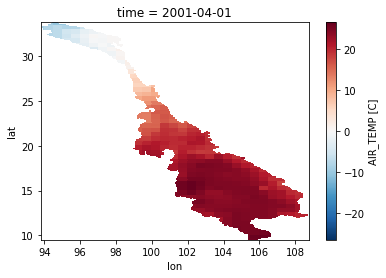

In [8]:
ds_my.temp.isel(time=0).plot()

In [64]:
ds_ref = xr.open_dataset("../backend/data/VIC_sample_data/image/WalnutGulch/forcings/livneh_NAmerExt_15Oct2014.WalnutGulch.2008.nc")
ds_ref

<xarray.Dataset>
Dimensions:         (lat: 3, lon: 5, time: 2928)
Coordinates:
  * time            (time) datetime64[ns] 2008-01-01 ... 2008-12-31T21:00:00
  * lon             (lon) float64 -110.2 -110.1 -110.0 -110.0 -109.9
  * lat             (lat) float64 31.66 31.72 31.78
Data variables:
    temp            (time, lat, lon) float64 ...
    shortwave       (time, lat, lon) float64 ...
    vapor_pressure  (time, lat, lon) float64 ...
    air_pressure    (time, lat, lon) float64 ...
    wind            (time, lat, lon) float64 ...
    rel_humid       (time, lat, lon) float64 ...
    prec            (time, lat, lon) float64 ...
    longwave        (time, lat, lon) float64 ...
    mask            (lat, lon) int32 ...

In [66]:
ds_my.time

<xarray.DataArray 'time' (time: 1644)>
array(['2001-04-01T00:00:00.000000000', '2001-04-01T04:00:00.000000000',
       '2001-04-01T08:00:00.000000000', ..., '2001-12-30T12:00:00.000000000',
       '2001-12-30T16:00:00.000000000', '2001-12-30T20:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2001-04-01 ... 2001-12-30T20:00:00
Attributes:
    long_name:      local time at grid location
    standard_name:  local_time

In [77]:
ds_my['time'] = xr.cftime_range("2001-04-01", "2001-12-30 20:00:00", freq="4H", calendar='proleptic_gregorian')

In [79]:
ds_my.to_netcdf("../backend/data/forcings/forcings_proleptic_gregorian_2001.nc")

In [80]:
ds_my

<xarray.Dataset>
Dimensions:         (lat: 389, lon: 239, time: 1644)
Coordinates:
  * time            (time) object 2001-04-01 00:00:00 ... 2001-12-30 20:00:00
  * lat             (lat) float64 33.78 33.72 33.66 33.59 ... 9.656 9.594 9.531
  * lon             (lon) float64 93.84 93.91 93.97 94.03 ... 108.6 108.7 108.7
Data variables:
    temp            (time, lat, lon) float32 ...
    prec            (time, lat, lon) float32 ...
    shortwave       (time, lat, lon) float32 ...
    longwave        (time, lat, lon) float32 ...
    vapor_pressure  (time, lat, lon) float32 ...
    air_pressure    (time, lat, lon) float32 ...
    wind            (time, lat, lon) float32 ...
Attributes: (12/31)
    conventions:              1.6
    title:                    Output from MetSim
    institution:              University of Washington
    source:                   metsim.py
    history:                  Created: Tue Jul  6 21:40:36 2021 by pdas47
    comment:                  no comment at this time
    ...                       ...
    rain_scalar:              0.75
    tday_coef:                0.45
    lapse_rate:               0.0065
    chunks:                   {lat: 10, lon: 10}
    scheduler:                distributed
    forcing:                  /Users/pdas47/phd/rat_mekong_v3/backend/params/...

## Domain file

In [81]:
ref = xr.open_dataset("../backend/data/VIC_sample_data/image/WalnutGulch/parameters/domain.WalnutGulch.0.0625_deg.nc")
ref

<xarray.Dataset>
Dimensions:  (lat: 3, lon: 5, month: 12)
Coordinates:
  * month    (month) int32 0 1 2 3 4 5 6 7 8 9 10 11
  * lon      (lon) float64 -110.2 -110.1 -110.0 -110.0 -109.9
  * lat      (lat) float64 31.66 31.72 31.78
Data variables:
    t_pk     (month, lat, lon) float32 ...
    dur      (month, lat, lon) float32 ...
    frac     (lat, lon) float32 ...
    elev     (lat, lon) float32 ...
    mask     (lat, lon) int32 ...
    area     (lat, lon) float32 ...

In [13]:
my = xr.open_dataset("../backend/params/vic/domain.nc")

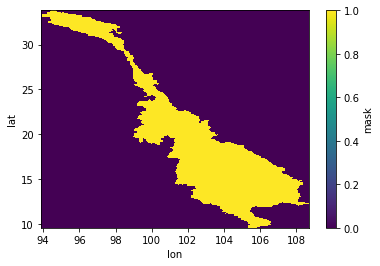

In [17]:
# my.fillna(0).to_netcdf("../backend/params/vic/domain_try1.nc")

# my.fillna(0).reindex(lat=list(reversed(my.lat))).to_netcdf("../backend/params/vic/domain_try1.nc")
my.fillna(0).reindex(lat=list(reversed(my.lat))).mask.plot()

In [24]:
param['run_cell'] = my.mask

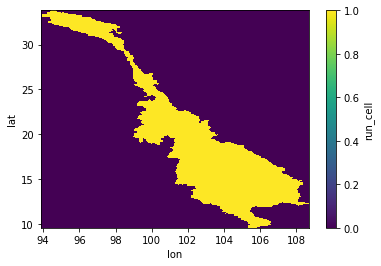

In [26]:
param.run_cell.plot()

In [27]:
param.to_netcdf("../backend/params/vic/params_all_mekong.nc")

# Hotfixing metsim inputs

In [1]:
import xarray as xr
import rasterio as rio
import os
import numpy as np
import datetime

indir = "../backend/data/metsim_inputs/"

In [3]:
ds = xr.open_dataset(os.path.join(indir, "2001.nc"))

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy']. Consider explicitly selecting one of the installed backends via the ``engine`` parameter to xarray.open_dataset(), or installing additional IO dependencies:
http://xarray.pydata.org/en/stable/getting-started-guide/installing.html
http://xarray.pydata.org/en/stable/user-guide/io.html

In [29]:
ds

<xarray.Dataset>
Dimensions:  (lat: 388, lon: 237, time: 274)
Coordinates:
  * time     (time) datetime64[ns] 2001-04-01 2001-04-02 ... 2001-12-30
  * lat      (lat) float64 33.78 33.72 33.66 33.59 ... 9.781 9.719 9.656 9.594
  * lon      (lon) float64 93.91 93.97 94.03 94.09 ... 108.5 108.5 108.6 108.7
Data variables:
    precip   (time, lat, lon) float64 ...
    tmax     (time, lat, lon) float64 ...
    tmin     (time, lat, lon) float64 ...
    wind     (time, lat, lon) float64 ...
    extent   (lat, lon) float32 ...

In [21]:
precip_da = xr.DataArray(
    data = np.zeros((1, 388, 237)),
    coords=[[datetime.datetime(2001, 12, 31)], ds.lat, ds.lon],
    dims=['time', 'lat', 'lon']
)

<xarray.DataArray (time: 1, lat: 388, lon: 237)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * time     (time) datetime64[ns] 2001-12-31
  * lat      (lat) float64 33.78 33.72 33.66 33.59 ... 9.781 9.719 9.656 9.594
  * lon      (lon) float64 93.91 93.97 94.03 94.09 ... 108.5 108.5 108.6 108.7

In [6]:
# year = 2001

years = range(2003, 2022)
for year in years:
    print(year)
    ds = xr.open_dataset(os.path.join(indir, f"{year}.nc"))

    precipfilepath = os.path.join('../backend/data/processed', f'precipitation/{year}-12-31_IMERG.asc')
    precipitation = rio.open(precipfilepath).read(1)#.flatten()[self.gridvalue==0.0]

    #Reading Maximum Temperature ASCII file contents
    tmaxfilepath = os.path.join('../backend/data/processed', f'tmax/{year}-12-31_TMAX.asc')
    tmax = rio.open(tmaxfilepath).read(1)#.flatten()[self.gridvalue==0.0]

    #Reading Minimum Temperature ASCII file contents
    tminfilepath = os.path.join('../backend/data/processed', f'tmin/{year}-12-31_TMIN.asc')
    tmin = rio.open(tminfilepath).read(1)#.flatten()[self.gridvalue==0.0]

    #Reading Average Wind Speed ASCII file contents
    uwndfilepath = os.path.join('../backend/data/processed', f'uwnd/{year}-12-31_UWND.asc')
    uwnd = rio.open(uwndfilepath).read(1)

    # #Reading Average Wind Speed ASCII file contents
    vwndfilepath = os.path.join('../backend/data/processed', f'vwnd/{year}-12-31_VWND.asc')
    vwnd = rio.open(vwndfilepath).read(1)
    wind = (0.75*np.sqrt(uwnd**2 + vwnd**2))#.flatten()[self.gridvalue==0.0]

    precip_da = xr.DataArray(
        data = np.expand_dims(precipitation, axis=0),
        coords=[[datetime.datetime(2001, 12, 31)], ds.lat, ds.lon],
        dims=['time', 'lat', 'lon']
    )
    tmax_da = xr.DataArray(
        data = np.expand_dims(tmax, axis=0),
        coords=[[datetime.datetime(2001, 12, 31)], ds.lat, ds.lon],
        dims=['time', 'lat', 'lon']
    )

    tmin_da = xr.DataArray(
        data = np.expand_dims(tmin, axis=0),
        coords=[[datetime.datetime(2001, 12, 31)], ds.lat, ds.lon],
        dims=['time', 'lat', 'lon']
    )

    wind_da = xr.DataArray(
        data = np.expand_dims(wind, axis=0),
        coords=[[datetime.datetime(2001, 12, 31)], ds.lat, ds.lon],
        dims=['time', 'lat', 'lon']
    )

    add_ds = xr.Dataset(
        data_vars=dict(
            precip = precip_da,
            tmax = tmax_da,
            tmin = tmin_da,
            wind = wind_da
        )
    )

    resulting_ds = xr.concat([ds, add_ds], dim='time', data_vars='minimal')
    ds.close()
    resulting_ds.to_netcdf(os.path.join(indir, f"{year}_corrected.nc"))

2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


RasterioIOError: ../backend/data/processed/precipitation/2021-12-31_IMERG.asc: No such file or directory